In [1]:
from sklearn.metrics import confusion_matrix
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import matthews_corrcoef, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, accuracy_score

In [2]:
file1_path = "/mnt/data05/shared/pdutta_data/DNABERT_data/ft/1100BP_Prom_5:1/2021-12-29_13:04:33_result/pred_results.npy"

In [3]:
pred_torch= torch.from_numpy(np.load(file1_path))

In [4]:
pred_torch

tensor([0.0164, 0.0043, 0.9955,  ..., 0.1429, 0.0332, 0.0052])

In [5]:
t = torch.Tensor([0.5])

In [6]:
pred_out = (pred_torch > t).float() * 1

In [7]:
pred_out

tensor([0., 0., 1.,  ..., 0., 0., 0.])

In [8]:
pred_out.shape

torch.Size([40107])

In [9]:
pred_out.numpy()

array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

In [10]:
dev_tsv = pd.read_csv("/mnt/data05/shared/pdutta_data/DNABERT_data/Promoter_prediction/1100BP_promoter_prediction_data/5:1/dev.tsv",sep= "\t")

In [11]:
dev_tsv.groupby(['label']).size()

label
0    33809
1     6298
dtype: int64

In [12]:
actual_pred = dev_tsv['label'].to_numpy()

In [13]:
actual_pred

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
cf_matrix = confusion_matrix(actual_pred, pred_out.numpy())

In [17]:
confusion_matrix( pred_out.numpy(), actual_pred)

array([[32330,  2258],
       [ 1479,  4040]])

In [18]:
cf_matrix

array([[32330,  1479],
       [ 2258,  4040]])

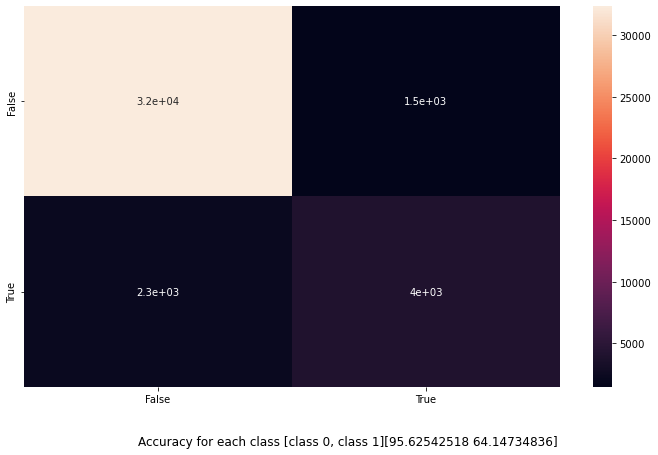

In [17]:
df_cm = pd.DataFrame(cf_matrix, index = [i for i in range(2)],
                     columns = [i for i in range(2)])
plt.figure(figsize = (12,7))
ax = sn.heatmap(df_cm, annot=True)
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
class_accuracy=str("Accuracy for each class [class 0, class 1]")+str(100*cf_matrix.diagonal()/cf_matrix.sum(1))
plt.figtext(0.5, 0.01, class_accuracy, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig('output_1100bp_5:1.png')

In [37]:
class_accuracy=100*cf_matrix.diagonal()/cf_matrix.sum(1)
print(class_accuracy)

[95.08318799 58.21698113]


In [58]:
df_cm

,0,1
0,8.060937,0.368764
1,0.562994,1.007305


In [59]:
df_cm = pd.DataFrame(cf_matrix, index = [i for i in range(2)],
                     columns = [i for i in range(2)])

In [60]:
df_cm

,0,1
0,32330,1479
1,2258,4040


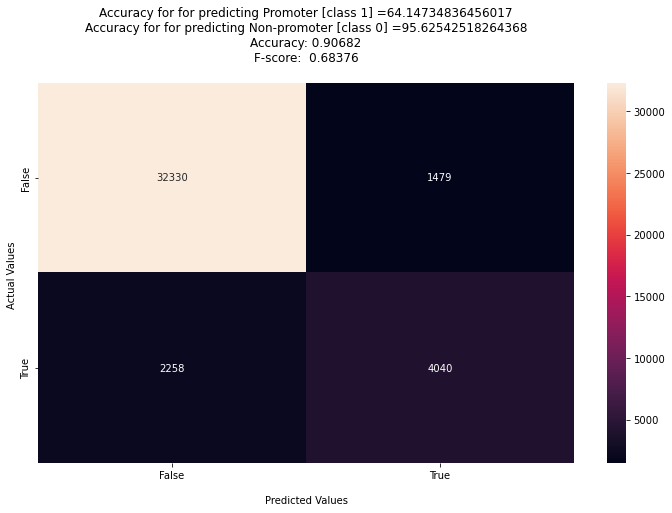

In [22]:
group_names = ['False Neg','False Pos','True Neg','True Pos']

labels = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# group_percentages = ["{0:.2%}".format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]

# labels = [f"{v1}\n{v2}" for v1, v2 in
#           zip(group_names,labels)]

labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (12,7))
class_accuracy = 100*cf_matrix.diagonal()/cf_matrix.sum(1)
ax = sn.heatmap(cf_matrix, annot=labels, fmt='')
title="Accuracy for for predicting Promoter [class 1] ="+ str(class_accuracy[1])+"\n" \
        "Accuracy for for predicting Non-promoter [class 0] ="+ str(class_accuracy[0])+"\n" \
        "Accuracy: {:.5f}".format(accuracy_score(actual_pred, pred_out.numpy()))+"\n" \
        "F-score:  {:.5f}".format(f1_score(actual_pred, pred_out.numpy()))+"\n" \

ax.set_title(title);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.savefig('output_1100bp_5:1.png')
## Display the visualization of the Confusion Matrix.
plt.show()


In [24]:
path = "/mnt/data05/shared/pdutta_data/DNABERT_data/ft/1100BP_Prom_5:1/6"

In [28]:
path.split("/")[-2]

'1100BP_Prom_5:1'

In [30]:
name= path.split("/")[-2]+ str('_confusion_matrix.png')

In [31]:
name

'1100BP_Prom_5:1_confusion_matrix.png'